In [2]:
import cv2
import numpy as np

# 创建一张A4纸大小的空白图像，通常使用300 DPI分辨率
width, height = int(21000), int(29700)  # 将英寸转换为像素
a4_paper = np.ones((height, width, 3), np.uint8) * 255  # 创建一个白色背景图像

# 导入自定义大小的图像并调整大小以适应A4纸
image = cv2.imread('my_plot.png')  # 替换为您的图像文件路径

# 计算目标尺寸
target_width = int(1673)
target_height = int(992)

# 检查目标尺寸是否合法
if target_width > 0 and target_height > 0:
    image = cv2.resize(image, (target_width, target_height))

    # 在A4背景图像上绘制导入的图像，放置在A4中央
    x_offset = (a4_paper.shape[1] - image.shape[1]) // 2
    y_offset = (a4_paper.shape[0] - image.shape[0]) // 2
    a4_paper[y_offset:y_offset + image.shape[0], x_offset:x_offset + image.shape[1]] = image

    
    # 保存生成的图像
    cv2.imwrite('output_image.png', a4_paper)
else:
    print("目标尺寸无效")

只用opencv，在A4纸上生成所需的扇环

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# A4
width, height = int(21000), int(29700)
image = np.ones((height, width, 3), dtype=np.uint8)*255

# 定义扇形的参数
center = (5000, 0)  # 扇形的中心坐标
in_radius = 3082 #内圆半径
radius = 4206  # 扇形的半径
start_angle = 0  # 扇形的起始角度（度数）
end_angle = 163.49  # 扇形的终止角度（度数）
color = (0, 255, 0)  # 扇形的颜色，这里是绿色
inner_color = (255,255,255)
thickness = -1  # 填充扇形，使用负数线宽值

# 使用OpenCV的绘图函数绘制扇形
cv2.ellipse(image, center, (radius, radius), 0, start_angle, end_angle, color, thickness)
cv2.ellipse(image, center, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness)


# 保存绘制好的图像
cv2.imwrite('fanRing.png', image)
# plt.imshow(image)

# 显示图像
# cv2.imshow('fanRing', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

生成一圈朝向圆心的二维码

/home/daic/Desktop/cv_work/output_markers/marker_2.png
/home/daic/Desktop/cv_work/output_markers/marker_3.png
/home/daic/Desktop/cv_work/output_markers/marker_6.png
/home/daic/Desktop/cv_work/output_markers/marker_8.png
/home/daic/Desktop/cv_work/output_markers/marker_4.png
/home/daic/Desktop/cv_work/output_markers/marker_7.png
/home/daic/Desktop/cv_work/output_markers/marker_5.png
/home/daic/Desktop/cv_work/output_markers/marker_1.png
i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7


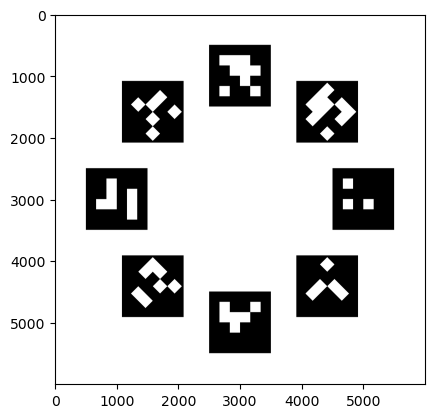

In [10]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os


# 定义图片文件夹路径
image_folder = '/home/daic/Desktop/cv_work/output_markers'

# 获取图片文件夹中的所有文件
image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.png')]

# 创建一个空列表来存储读取的图片
images = []

# 使用循环读取每张图片并存储在列表中
for image_file in image_files:
    print(image_file)
    image = cv2.imread(image_file)
    if image is not None:
        images.append(image)
    else:
        print(f"Failed to read image: {image_file}")


# 图片尺寸和数量
image_width, image_height = 1000, 1000
num_images = len(images)

# 圆环的半径和中心坐标
radius = 2000
center_x, center_y = 3000, 3000


# 创建一个空白画布
canvas = 255 * np.ones((6000, 6000, 3), dtype=np.uint8)

# 计算每张图片的角度间隔
angle_step = 360 / num_images


for i in range(num_images):
    print(f'i={i}')
    angle_deg = i * angle_step
    angle_rad = math.radians(angle_deg) #angle_rad = angle_deg * π / 180
    x = int(center_x + radius * math.cos(angle_rad)) - image_width // 2
    y = int(center_y + radius * math.sin(angle_rad)) - image_height // 2


    # 计算旋转角度，使图片面向圆心
    rotation_angle_deg = -angle_deg  # 负号用于逆时针旋转
    rotation_matrix = cv2.getRotationMatrix2D((image_width // 2, image_height // 2), rotation_angle_deg, 1)
    rotated_image = cv2.warpAffine(images[i], rotation_matrix, (image_width, image_height))

    # 将旋转后图片放在计算出的位置上
    canvas[y:y + image_height, x:x + image_width] = rotated_image

    plt.imshow(canvas)
# # 显示圆环
# cv2.imshow('Circular Layout with Rotation', canvas)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

旋转图片不截断

In [29]:
import cv2
import numpy as np

# 读取图片
image = cv2.imread('westbrook.jpg')

# 获取图片的中心点坐标
height, width = image.shape[:2]
center = (width // 2, height // 2)

# 定义旋转矩阵
angle = 45  # 旋转角度
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

# 计算旋转后的图像尺寸
cosine = np.abs(rotation_matrix[0, 0])
sine = np.abs(rotation_matrix[0, 1])
new_width = int((height * sine) + (width * cosine))
new_height = int((height * cosine) + (width * sine))

# 调整旋转矩阵以确保图像不被裁剪
rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

# 进行旋转
rotated_image = cv2.warpAffine(image, rotation_matrix, (new_width, new_height), flags=cv2.INTER_LINEAR)

# 显示旋转后的图像
cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


完整生成带二维码的扇环

In [6]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os

####################################1.生成扇环#####################################
# A4
width, height = int(21000), int(29700)
canvas = np.ones((height, width, 3), dtype=np.uint8)*255

# 定义扇形的参数
center = (5000, 1000)  # 扇形的中心坐标
in_radius = 3082 #内圆半径
radius = 4206  # 扇形的半径
start_angle = 0  # 扇形的起始角度（度数）
end_angle = 163.49  # 扇形的终止角度（度数）
color = (0, 255, 0)  # 扇形的颜色，这里是绿色
inner_color = (255,255,255)
thickness = -1  # 填充扇形，使用负数线宽值

# 使用OpenCV的绘图函数绘制扇形
cv2.ellipse(canvas, center, (radius, radius), 0, start_angle, end_angle, color, thickness)
cv2.ellipse(canvas, center, (in_radius, in_radius), 0, start_angle, end_angle, inner_color, thickness)


# # 保存绘制好的图像
# cv2.imwrite('fanRing.png', canvas)
# plt.imshow(image)

# 显示图像
# cv2.imshow('fanRing', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [7]:
#################################2.添加二维码###########################

# 定义图片文件夹路径
image_folder = '/home/daic/Desktop/cv_work/output_markers'

# 获取图片文件夹中的所有文件
image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.png')]

# 创建一个空列表来存储读取的图片
images = []

# 使用循环读取每张图片并存储在列表中
for image_file in image_files:
    print(image_file)
    image = cv2.imread(image_file)
    if image is not None:
        images.append(image)
    else:
        print(f"Failed to read image: {image_file}")


# 图片尺寸和数量
image_width, image_height = 1000, 1000
num_images = len(images)

# 圆环的半径和中心坐标
radius = 3644
center_x, center_y = 5000, 1000


# 创建一个空白画布
# canvas = 255 * np.ones((6000, 6000, 3), dtype=np.uint8)

# 计算每张图片的角度间隔
angle_step = 163.49 / num_images


for i in range(num_images):
    print(f'i={i}')
    angle_deg = i * angle_step
    angle_rad = math.radians(angle_deg) #angle_rad = angle_deg * π / 180
    x = int(center_x + radius * math.cos(angle_rad)) - image_width // 2
    y = int(center_y + radius * math.sin(angle_rad)) - image_height // 2


    # 计算旋转角度，使图片面向圆心
    rotation_angle_deg = -angle_deg  # 负号用于逆时针旋转
    rotation_matrix = cv2.getRotationMatrix2D((image_width // 2, image_height // 2), rotation_angle_deg, 1)
    rotated_image = cv2.warpAffine(images[i], rotation_matrix, (image_width, image_height))

    # 将旋转后图片放在计算出的位置上
    canvas[y:y + image_height, x:x + image_width] = rotated_image

# plt.imshow(canvas)
# 保存绘制好的图像
cv2.imwrite('arucoRing.png', canvas)
# # 显示圆环
# cv2.imshow('Circular Layout with Rotation', canvas)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

/home/daic/Desktop/cv_work/output_markers/marker_2.png
/home/daic/Desktop/cv_work/output_markers/marker_3.png
/home/daic/Desktop/cv_work/output_markers/marker_6.png
/home/daic/Desktop/cv_work/output_markers/marker_8.png
/home/daic/Desktop/cv_work/output_markers/marker_4.png
/home/daic/Desktop/cv_work/output_markers/marker_7.png
/home/daic/Desktop/cv_work/output_markers/marker_5.png
/home/daic/Desktop/cv_work/output_markers/marker_1.png
i=0
i=1
i=2
i=3
i=4
i=5
i=6
i=7


True